In [ ]:
#EJERCICIO 1
#Escribe un trozo de código que sirva para definir un modelo en Keras para solucionar el
#siguiente problema (solo tenéis que definir el modelo pero tiene que poder compilarse la celda,
#i.e. que no de error). Muestra el resumen del modelo por pantalla.
#Tenemos un problema de clasificación de objetos donde tenemos 5000 imágenes de 28x28 en
#color. Para cada objeto tenemos una etiqueta numérica con valores de [0-19] (20 clases de
#objetos distintas).

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from time import time
import shutil
!pip install pydot
!pip install graphviz
import graphviz
import pydot

In [ ]:
#Cargo los datos de MNIST

#CAMBIAR EL DATA SET XQ LAS IMAGENES TIENEN QUE SER EN COLOR
#COGER IRIS QUE ES UN DATASET DE FOTOS DE FLORES
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

print(train_images.shape)
print(train_labels.shape)
print(train_labels)

print(test_images.shape)
print(test_labels.shape)
print(test_labels)

(60000, 28, 28)
(60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28)
(10000,)
[7 2 1 ... 4 5 6]


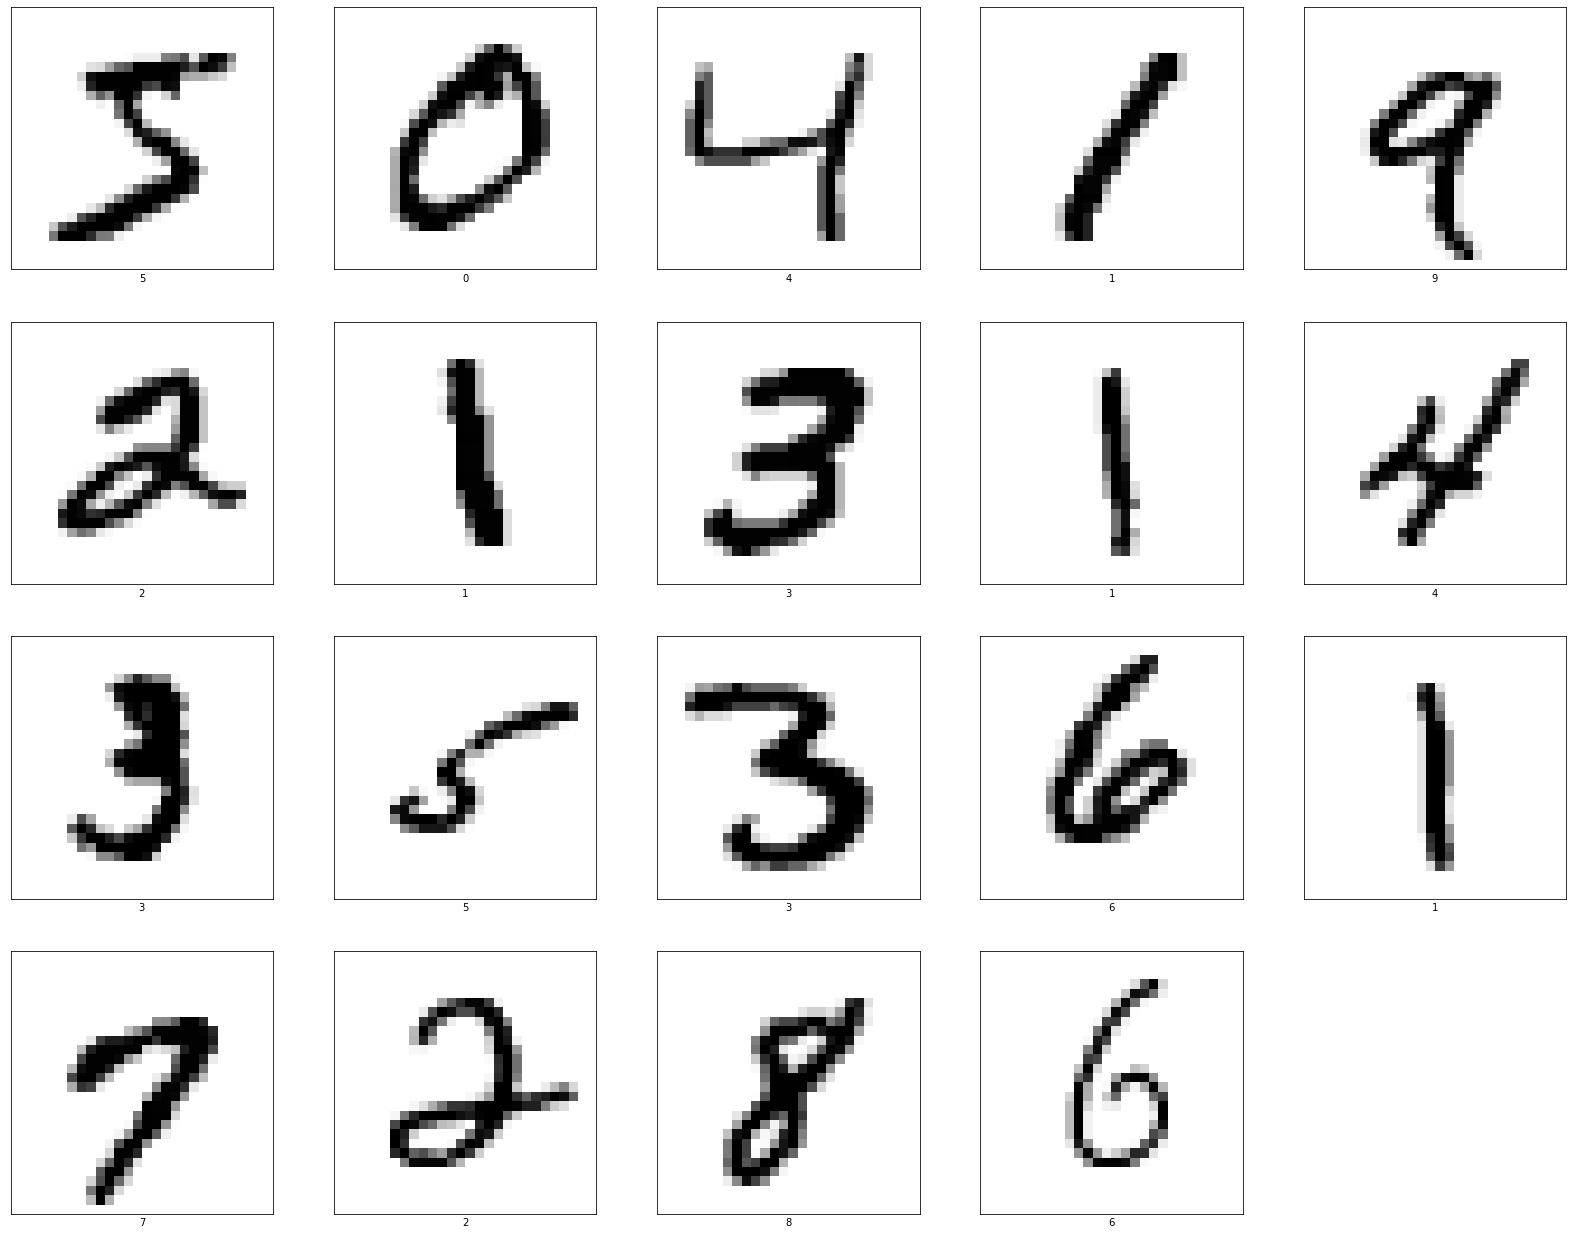

In [ ]:
#Dibujo las imagenes pasandole las medidas necesarias
#ESTO ESTA BIEN, NO TOCAR
plt.figure(figsize=(28,28))
for i in range(19):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

In [ ]:
#Normalizo todas las imagenes
mean_img = train_images.mean(axis=0)
train_images = train_images - mean_img
test_images = test_images - mean_img

In [ ]:
#defino el modelo. Input_sghape es asi dado que las imagenes son 28x28 y tiene 3 canales dado que el color es la 3a dimension y en la ultima capa pongo 20 neuronas dado que hay 20 clases
#PONER UNA CAPA CONVOLUCIONAL QUE AUNQUE NO LO PONGA EN EL ENUNCIADO HABRA QUE PONERLO X SI ACASO
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28, 3), name="entrada"))
model.add(keras.layers.Dense(30, activation="sigmoid", name="oculta"))
model.add(keras.layers.Dense(20, activation="softmax", name="salida"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
entrada (Flatten)            (None, 2352)              0         
_________________________________________________________________
oculta (Dense)               (None, 30)                70590     
_________________________________________________________________
salida (Dense)               (None, 20)                620       
Total params: 71,210
Trainable params: 71,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compilo el modelo
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), 
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
#Resumen del modelo
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [ ]:
#EJERCICIO 2
#Escribe un trozo de código que sirva para definir un modelo en Keras que tenga al menos
#dos capas LSTM, una capa GRU y una densa. Muestra el resumen del modelo por pantalla.
#Tenemos 20000 datos de series temporales de un activo financiero, cada dato tiene una
#longitud de 11. Las salidas son las predicciones para el instante temporal siguiente.

In [2]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation,LSTM, GRU, Conv2D,MaxPooling2D, Flatten, Dropout,Convolution1D, Dense, MaxPooling1D
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd

In [ ]:
#Le paso datos al modelo para ver si realmente funciona a la hora de crearlo y compilarlo
dd_googl = pd.read_csv("C:\\Users\\ignac\\OneDrive\\Escritorio\\BME\\Master\\CLASES\\Modulo 4\\Redes Convolucionales\\Diccionario\\Leer_datos\\googl.us.txt", delimiter=",")
googl_op = dd_googl['Open']

In [ ]:
#Defino el modelo usando las capas requeridas
model_2 = Sequential()

model_2.add(LSTM(20, input_shape=(11,1), return_sequences=True))
model_2.add(LSTM(20, dropout=0.2, return_sequences=True))

model_2.add(GRU(64, input_shape=(11,1)))

model_2.add(Dense(1))


In [ ]:
#Compilo el modelo
model_2.compile(optimizer='adam',loss='mae')

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 11, 20)            1760      
_________________________________________________________________
lstm_1 (LSTM)                (None, 11, 20)            3280      
_________________________________________________________________
gru (GRU)                    (None, 64)                16512     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 21,617
Trainable params: 21,617
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Ejercicio 3
#Escribe un trozo de código que sirva para definir un modelo en Keras que combine al
#menos una capa LSTM, tres convolucionales y una densa. Muestra el resumen del modelo por
#pantalla.
#Tenemos 10000 datos de series temporales de 5 activos financieros de longitud 4, i.e.
#(10000,4,5). Las salidas son las predicciones para el instante temporal siguiente, i.e. (10000,1).

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, LSTM
import numpy as np

In [ ]:
#AQUI TENGO QUE PONER LOS DATOS DE LOS 5 ACTIVOS DE LONGITUD 4
hist_google = pd.read_csv("C:\\Users\\ignac\\OneDrive\\Escritorio\\BME\\Master\\CLASES\\Modulo 4\\Redes Convolucionales\\Diccionario\\Leer_datos\\googl.us.txt", delimiter=",")
print(hist_google)

            Date      Open     High       Low     Close    Volume  OpenInt
0     2004-08-19    50.000    52.03    47.980    50.170  44703800        0
1     2004-08-20    50.505    54.54    50.250    54.155  22857200        0
2     2004-08-23    55.375    56.74    54.525    54.700  18274400        0
3     2004-08-24    55.620    55.80    51.785    52.435  15262600        0
4     2004-08-25    52.480    54.00    51.940    53.000   9197800        0
...          ...       ...      ...       ...       ...       ...      ...
3328  2017-11-06  1049.100  1052.59  1042.000  1042.680    913954        0
3329  2017-11-07  1049.650  1053.41  1043.000  1052.390   1303832        0
3330  2017-11-08  1050.050  1062.69  1047.050  1058.290   1214469        0
3331  2017-11-09  1048.000  1050.88  1035.850  1047.720   1793994        0
3332  2017-11-10  1043.870  1046.63  1041.220  1044.150    970498        0

[3333 rows x 7 columns]


In [ ]:
#PRUEBA PARA VER SI PUEDO TRABAJAR CON 10.000 DATOS
from api_bme import APIBMEHandler
APIBME = APIBMEHandler('IBEX', 'ignaciobermejo_algo1')
maestro_df = APIBME.get_ticker_master()
data_close, data_high, data_low, data_open, data_vol = APIBME.get_data()
benchmark = APIBME.get_close_data_ticker('benchmark')

data_close.shape

(2947, 64)

In [ ]:
#Divido los datos para para hacer una prueba y ver si funciona con 5 requisitos distintos   que luego habra que cambiar por los activos necesarios
google_op=hist_google['Open']
google_cl=hist_google['Close']
google_vol=hist_google['Volume']
google_high=hist_google['High']
google_low=hist_google['Low']

hist_google.shape

(3333, 7)

In [ ]:
#Realizo la particion del modelo en train y test
#forma 10000,4,5
op=google_op.values[np.arange(0,2000,1)]
cl=google_cl.values[np.arange(0,2000,1)]
vol=google_vol.values[np.arange(0,2000,1)]
high=google_high.values[np.arange(0,2000,1)]
low=google_low.values[np.arange(0,2000,1)]

op_train=np.reshape(op,(200,10,1))
cl_train = cl[np.arange(9,2000,10)]

op_train.shape

(200, 10, 1)

In [ ]:
#Defino el modelo
model_3 = Sequential()

model_3.add(LSTM(20, input_shape=(4,5), return_sequences=True))
model_3.add(Dropout(0.2))
model_3.add(Conv1D(15, kernel_size=3, padding='same'))
model_3.add(Dropout(0.2))
model_3.add(Conv1D(10, kernel_size=2))
model_3.add(Dropout(0.2))
model_3.add(Conv1D(5,kernel_size=1))
model_3.add(Dropout(0.2))
model_3.add(Dense(1))

In [ ]:
#Compilo el modelo
model_3.compile(optimizer='adam',loss='mae')

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 4, 20)             2080      
_________________________________________________________________
dropout (Dropout)            (None, 4, 20)             0         
_________________________________________________________________
conv1d (Conv1D)              (None, 4, 15)             915       
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 15)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3, 10)             310       
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 10)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 3, 5)             

In [ ]:
#Ejercicio 4
#Entrena un modelo en Keras que tenga al menos tres capas convolucionales, use
#regularización y early stopping para resolver el problema de clasificación con los datos
#Fashion MNIST que están en Keras. Comprueba que el proceso de entrenamiento ha
#convergido mostrando las curvas de entrenamiento. 

In [30]:
import tensorflow as tf
from tensorflow import keras
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Dropout, Dense, Conv2D, Flatten
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from keras.regularizers import l1, l2, l1_l2
from keras.optimizers import Adam

In [4]:
#Importo los datos y separo el modelo
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
#Creo una etiquetya para cada producto, solo lo uso para plotear los productos
productos = ['camisetas', 'Pantalones', 'Abrigos', 'Vestidos', 'Chaquetas',
               'Chanclas', 'Camisas', 'Zapatillas', 'Bolsos', 'Botas altas']

In [8]:
train_images.shape

(60000, 28, 28)

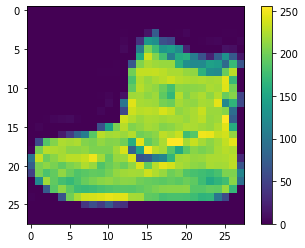

In [7]:
#Inspecciono la primera imagen para saber el numero de pixeles que tiene
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
#Normalizo las imagenes de los sets de entrenameinto y validacion
train_images = train_images / 255

test_images = test_images / 255

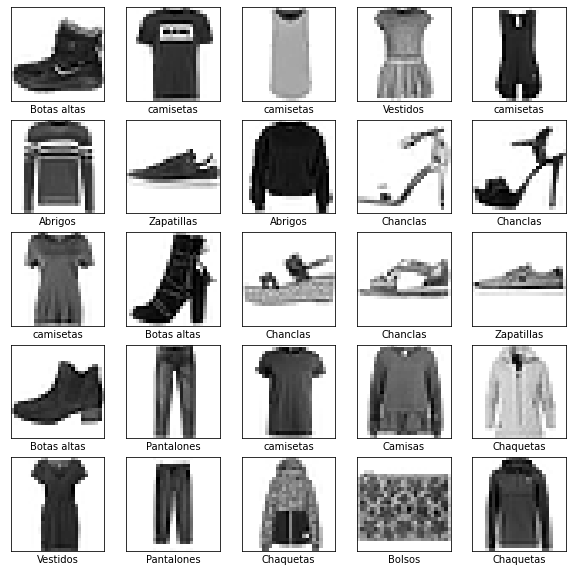

In [10]:
#Compruebo como son las imagenes de los datos
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(productos[train_labels[i]])
plt.show()

In [12]:
#hago un reshape para qpasarle las dimensiones correctas al modelo que si no se jode
train_images = train_images.reshape(60000, 28, 28, 1)#se pone el 1 porque son fotos sin color

test_images = test_images.reshape(10000, 28,28, 1)

In [13]:
#Hago un One Hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [14]:
#ESTO ES UNA PRUEBAAAAAAAAAAAAAAAAAAAAA
input_shape = train_images.shape[1:]

modelo_4 = Sequential()

modelo_4.add(Conv2D(32, kernel_size=(4,6), activation='relu', input_shape=input_shape, padding='same', kernel_regularizer=l2(0.01)))
modelo_4.add(Dropout(0.3))
modelo_4.add(Conv2D(32, kernel_size=(3,3), activation='relu', kernel_regularizer=l2(0.01)))
modelo_4.add(Dropout(0.3))
modelo_4.add(Conv2D(32, kernel_size=(3,3), activation='relu', kernel_regularizer=l2(0.01)))
modelo_4.add(Dropout(0.3))
modelo_4.add(Flatten())
modelo_4.add(Dense(10, activation='softmax'))

In [31]:
#Compilo el modelo
modelo_4.compile(Adam(learning_rate=(0.0001)),
                 loss='categorical_crossentropy', 
                 metrics=['acc'])

In [32]:
# Establecemos el early stopping. Si hay 10 épocas en las que el error de validación no baja el entrenamiento termina.
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10) 
historia = modelo_4.fit(train_images, train_labels, validation_data=(test_images, test_labels), batch_size=64, epochs=20, callbacks=early_stop)

Epoch 1/20
938/938 [==============================] - 7s 7ms/step - loss: 0.3694 - acc: 0.8861 - val_loss: 0.3770 - val_acc: 0.8858
Epoch 2/20
938/938 [==============================] - 6s 7ms/step - loss: 0.3648 - acc: 0.8869 - val_loss: 0.3851 - val_acc: 0.8825
Epoch 3/20
938/938 [==============================] - 6s 7ms/step - loss: 0.3615 - acc: 0.8902 - val_loss: 0.3769 - val_acc: 0.8846
Epoch 4/20
938/938 [==============================] - 7s 7ms/step - loss: 0.3569 - acc: 0.8904 - val_loss: 0.3732 - val_acc: 0.8858
Epoch 5/20
938/938 [==============================] - 7s 7ms/step - loss: 0.3548 - acc: 0.8912 - val_loss: 0.3741 - val_acc: 0.8868
Epoch 6/20
938/938 [==============================] - 6s 7ms/step - loss: 0.3503 - acc: 0.8935 - val_loss: 0.3686 - val_acc: 0.8869
Epoch 7/20
938/938 [==============================] - 6s 7ms/step - loss: 0.3501 - acc: 0.8933 - val_loss: 0.3619 - val_acc: 0.8886
Epoch 8/20
938/938 [==============================] - 6s 7ms/step - loss: 0.

In [ ]:
#early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.03)

In [33]:
modelo_4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        800       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0

In [34]:
score_4 = modelo_4.evaluate(test_images,test_labels)
score_4

313/313 [==============================] - 1s 2ms/step - loss: 0.3469 - acc: 0.8932


[0.3468942940235138, 0.8931999802589417]

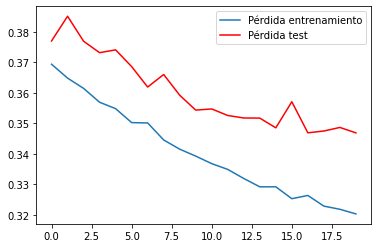

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure
plt.plot(historia.history['loss'], label='Pérdida entrenamiento')
plt.plot(historia.history['val_loss'], 'r', label='Pérdida test')
plt.legend()

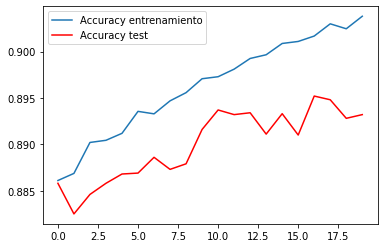

In [36]:
%matplotlib inline
plt.figure
plt.plot(historia.history['acc'], label='Accuracy entrenamiento')
plt.plot(historia.history['val_acc'], 'r', label='Accuracy test')
plt.legend()

In [ ]:
#EJERCICIO 5
#Entrena un modelo en Keras que use 3 tipos de regularización y use capas
#convolucionales pero no uses capas densas ni recurrentes (pista, piensa bien las capas de
#pooling). El modelo ha de usarse para resolver el problema de clasificación con los datos
#CIFAR100 que están en Keras. Razona sobre la evolución del error en las curvas de
#entrenamiento.
#Compara los tiempos de entrenamiento y predicción con y sin GPU (usando tu GPU o la de
#Colab).

#Ejemplo de CNN 2D en la base de datos cifar100 ESTA HECHO EN LA CARPETA CONVOLUCIONALES, SCRIPS CNN 2D en la base de datos cifar100

In [37]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [38]:
#Descargamos los datos cifar100 y los partimos en train y test
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data()

169009152/169001437 [==============================] - 3s 0us/step


In [39]:
#Determino la forma de los datos
img_width, img_pesos, img_num_canales = 32, 32, 3
input_shape = (img_width, img_pesos, img_num_canales)

In [40]:
#Tamaño de los datos (#datos,#lado,#alto,#canales)
print(y_train.shape)

(50000, 1)


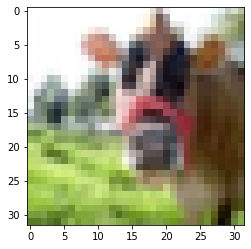

In [41]:
#Veo la primera imagen del dataset
plt.imshow(X_train[0],cmap="gray")

In [ ]:
#One-hot encoding en las 'y'
#from tensorflow.keras.utils import to_categorical

#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

In [42]:
#Normalizo las imagenes
X_train = X_train / 255
X_test = X_test / 255

In [74]:
model_5 = Sequential()
model_5.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_5.add(MaxPooling2D(pool_size=(2, 2)))
model_5.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_5.add(MaxPooling2D(pool_size=(2, 2)))
model_5.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model_5.add(MaxPooling2D(pool_size=(2, 2)))
model_5.add(Flatten())
#model_5.add(Dense(256, activation='relu'))
#model_5.add(Dense(128, activation='relu'))
#model_5.add(Flatten(10, activation='softmax'))

In [75]:
#CompilO el modelo
model_5.compile(optimizer='adam', loss='mae', metrics=['accuracy'])

In [76]:
#Veo el resumen del modelo
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 32)          18464     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)              

In [77]:
#Entreno el modelo
history = model_5.fit(X_train, y_train,
            batch_size=50,
            epochs=10, #poner 100 luego
            verbose=1,
            validation_split=0.2)

Epoch 1/10
800/800 [==============================] - 4s 4ms/step - loss: 26.9058 - accuracy: 0.0083 - val_loss: 25.8703 - val_accuracy: 0.0067
Epoch 2/10
800/800 [==============================] - 3s 4ms/step - loss: 25.5269 - accuracy: 0.0075 - val_loss: 25.8019 - val_accuracy: 0.0086
Epoch 3/10
800/800 [==============================] - 3s 4ms/step - loss: 25.4845 - accuracy: 0.0078 - val_loss: 25.6583 - val_accuracy: 0.0083
Epoch 4/10
800/800 [==============================] - 3s 3ms/step - loss: 25.4324 - accuracy: 0.0078 - val_loss: 25.6391 - val_accuracy: 0.0080
Epoch 5/10
800/800 [==============================] - 3s 3ms/step - loss: 25.3982 - accuracy: 0.0087 - val_loss: 25.5525 - val_accuracy: 0.0087
Epoch 6/10
800/800 [==============================] - 3s 3ms/step - loss: 25.2939 - accuracy: 0.0073 - val_loss: 25.5251 - val_accuracy: 0.0076
Epoch 7/10
800/800 [==============================] - 3s 3ms/step - loss: 25.2328 - accuracy: 0.0070 - val_loss: 25.6826 - val_accuracy:

In [78]:
#Generalizo las metricas del modelo
score = model_5.evaluate(X_test, y_test)
score

313/313 [==============================] - 1s 3ms/step - loss: 25.2440 - accuracy: 0.0086


[25.243995666503906, 0.00860000029206276]

In [79]:
#Sin GPU de colab
early_stopping_no_gpu = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10) 
%time hist = model_5.fit(X_train, y_train, validation_split=0.2, batch_size=64, epochs=10, callbacks=early_stop) #pasarle mas epoca

Epoch 1/10
625/625 [==============================] - 3s 5ms/step - loss: 24.8587 - accuracy: 0.0071 - val_loss: 24.6165 - val_accuracy: 0.0088
Epoch 2/10
625/625 [==============================] - 3s 4ms/step - loss: 24.2746 - accuracy: 0.0070 - val_loss: 24.6198 - val_accuracy: 0.0090
Epoch 3/10
625/625 [==============================] - 3s 5ms/step - loss: 24.2049 - accuracy: 0.0074 - val_loss: 24.5409 - val_accuracy: 0.0097
Epoch 4/10
625/625 [==============================] - 3s 4ms/step - loss: 24.2299 - accuracy: 0.0077 - val_loss: 24.5394 - val_accuracy: 0.0078
Epoch 5/10
625/625 [==============================] - 3s 4ms/step - loss: 24.2244 - accuracy: 0.0074 - val_loss: 24.5300 - val_accuracy: 0.0099
Epoch 6/10
625/625 [==============================] - 3s 4ms/step - loss: 24.2034 - accuracy: 0.0075 - val_loss: 24.5838 - val_accuracy: 0.0089
Epoch 7/10
625/625 [==============================] - 3s 4ms/step - loss: 24.1477 - accuracy: 0.0079 - val_loss: 24.4980 - val_accuracy:

In [80]:
#Sin GPU de Colab
%time score_no_gpu = model_5.evaluate(X_test,y_test)
score_no_gpu

313/313 [==============================] - 1s 2ms/step - loss: 24.1370 - accuracy: 0.0069
CPU times: user 1.01 s, sys: 71.6 ms, total: 1.08 s
Wall time: 1.36 s


[24.13695526123047, 0.006899999920278788]

In [81]:
# Creamos de nuevo el modelo y medimos el tiempo de entrenamiento con GPU de colab
early_stopping_con_gpu = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10) 
%time hist_con_gpu = model_5.fit(X_train, y_train, validation_split=0.2, batch_size=64, epochs=20, callbacks=early_stop)

Epoch 1/20
625/625 [==============================] - 3s 4ms/step - loss: 24.1074 - accuracy: 0.0077 - val_loss: 24.4336 - val_accuracy: 0.0076
Epoch 2/20
625/625 [==============================] - 3s 4ms/step - loss: 24.0785 - accuracy: 0.0081 - val_loss: 24.4565 - val_accuracy: 0.0072
Epoch 3/20
625/625 [==============================] - 3s 5ms/step - loss: 24.0652 - accuracy: 0.0079 - val_loss: 24.5636 - val_accuracy: 0.0089
Epoch 4/20
625/625 [==============================] - 3s 4ms/step - loss: 24.0749 - accuracy: 0.0074 - val_loss: 24.4584 - val_accuracy: 0.0077
Epoch 5/20
625/625 [==============================] - 3s 4ms/step - loss: 24.0434 - accuracy: 0.0082 - val_loss: 24.4800 - val_accuracy: 0.0064
Epoch 6/20
625/625 [==============================] - 3s 4ms/step - loss: 24.0537 - accuracy: 0.0082 - val_loss: 24.4262 - val_accuracy: 0.0076
Epoch 7/20
625/625 [==============================] - 3s 4ms/step - loss: 24.0407 - accuracy: 0.0081 - val_loss: 24.7343 - val_accuracy:

In [82]:
# Con GPU de Colab
%time score_con_gpu = model_5.evaluate(X_test,y_test)
score_con_gpu

313/313 [==============================] - 1s 2ms/step - loss: 23.8986 - accuracy: 0.0079
CPU times: user 1.07 s, sys: 146 ms, total: 1.21 s
Wall time: 1.47 s


[23.898574829101562, 0.007899999618530273]

Como podemos comprobar al utilizar la GPU el procesamiento del modelo es claramente mucho mas superior a trabajr sin la GPU, esto es debido a que estamos utilizando la tarjeta grafica a su maxima expresion

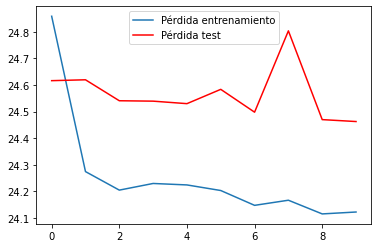

In [83]:
#Veo como convergen
%matplotlib inline
plt.figure
plt.plot(hist.history['loss'], label='Pérdida entrenamiento')
plt.plot(hist.history['val_loss'], 'r', label='Pérdida test')
plt.legend()

In [ ]:
#EJERCICIO 6
#Entrena un modelo en Keras con capas convolucionales para predecir el valor diario de cirre
#de bolsa de facebook (puedes usar los datos que vimos en clase y que están en kaggle).
#Utiliza de los datos de 10 días anteriores para predecir el valor del día actual.

In [136]:
#Cargo algunas librerias que necesitare para este ejercicio
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import datetime as dt
import pandas_datareader as web
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dropout, Dense

In [137]:
#Descargo los datos haceindo webscrapping de yahoo finance
#activo='FB'

#principio=dt.datetime(2012,1,1)
#fin=dt.datetime(2021,1,1)

#fb = web.DataReader(activo, 'yahoo', principio, fin)
#print(fb)

RemoteDataError: ignored

In [104]:
#fb = pd.read_csv('C:\\Users\\ignac\\OneDrive\\Escritorio\\BME\\Master\\CLASES\\Modulo 4\\Redes Convolucionales\\Practica\\fb.csv', sep=',')
fb = pd.read_csv('fb.csv', sep=',')
print(fb)

            Date    Open     High      Low   Close     Volume  OpenInt
0     2012-05-18   42.05   45.000   38.000   38.23  580438450        0
1     2012-05-21   36.53   36.660   33.000   34.03  169418988        0
2     2012-05-22   32.61   33.590   30.940   31.00  101876406        0
3     2012-05-23   31.37   32.500   31.360   32.00   73678512        0
4     2012-05-24   32.95   33.210   31.770   33.03   42560731        0
...          ...     ...      ...      ...     ...        ...      ...
1376  2017-11-06  178.56  180.450  178.310  180.17   13275578        0
1377  2017-11-07  180.50  180.748  179.403  180.25   12903836        0
1378  2017-11-08  179.79  180.350  179.110  179.56   10467606        0
1379  2017-11-09  178.31  179.400  177.090  179.30   12602188        0
1380  2017-11-10  178.35  179.100  177.960  178.46   11060355        0

[1381 rows x 7 columns]


In [105]:
#Preparo los datos
scaler=MinMaxScaler(feature_range=(0,1))
scaler_fb=scaler.fit_transform(fb['Close'].values.reshape(-1,1))

In [106]:
#Hago la particion de los datos con para entrenar el modelo y poder predecir la cotizacion con el cierre y le paso los dias que tengo que predecir
predecir_dias=1 #tenia puesto 10 por lo que predecia los 10 dias siguientes, lee mejor el puto enuciadoooooooooooo

xx_train=[]
zz_train=[]

In [107]:
for x in range(predecir_dias, len(scaler_fb)):
    xx_train.append(scaler_fb[x-predecir_dias:x, 0])
    zz_train.append(scaler_fb[x, 0])

xx_train, zz_train=np.array(xx_train), np.array(zz_train)
xx_train=np.reshape(xx_train, (xx_train.shape[0], xx_train.shape[1], 1))

In [108]:
#Creo el modelo to guapo con mis convolucionales
model_6=Sequential()

model_6.add(LSTM(units=50, return_sequences=True, input_shape=(xx_train.shape[1], 1)))
model_6.add(Dropout(0.2))
model_6.add(LSTM(units=50, return_sequences=True))
model_6.add(Dropout(0.2))
model_6.add(LSTM(units=50))
model_6.add(Dropout(0.2))
model_6.add(Dense(1)) #esta es la que me predice el cierre del dia siguiente

In [109]:
#compilo el modelo pasandole Adam como optimizador y como funcion de perdida Mean_Square_Error
model_6.compile(optimizer='adam',loss='mean_squared_error')

In [110]:
#Entreno el modelo
model_6.fit(xx_train, zz_train, epochs=25, batch_size=32)

Epoch 1/25
44/44 [==============================] - 5s 5ms/step - loss: 0.1485
Epoch 2/25
44/44 [==============================] - 0s 5ms/step - loss: 0.0340
Epoch 3/25
44/44 [==============================] - 0s 5ms/step - loss: 0.0106
Epoch 4/25
44/44 [==============================] - 0s 5ms/step - loss: 0.0048
Epoch 5/25
44/44 [==============================] - 0s 5ms/step - loss: 0.0046
Epoch 6/25
44/44 [==============================] - 0s 5ms/step - loss: 0.0037
Epoch 7/25
44/44 [==============================] - 0s 5ms/step - loss: 0.0039
Epoch 8/25
44/44 [==============================] - 0s 6ms/step - loss: 0.0038
Epoch 9/25
44/44 [==============================] - 0s 5ms/step - loss: 0.0031
Epoch 10/25
44/44 [==============================] - 0s 5ms/step - loss: 0.0029
Epoch 11/25
44/44 [==============================] - 0s 5ms/step - loss: 0.0027
Epoch 12/25
44/44 [==============================] - 0s 6ms/step - loss: 0.0026
Epoch 13/25
44/44 [==============================

In [111]:
#Ahora compruebo la precision del modelo, para ello veo la fecha en la que empieza la cotizacion y la ultima fecha
test_comienzo=dt.datetime(2012,5,18)
test_fin=dt.datetime.now()

In [112]:
test_comienzo=fb['Date'].first
test_fin=fb['Date'].last

In [113]:
#Saco los valores de cotizacion para hacer el test
#fb_test = web.DataReader(activo, 'yahoo', test_comienzo, test_fin)

#precio_actual = fb_test['Close'].values
#print(precio_actual)

NameError: ignored

In [114]:
#fb_test = pd.read_csv('C:\\Users\\ignac\\OneDrive\\Escritorio\\BME\\Master\\CLASES\\Modulo 4\\Redes Convolucionales\\Practica\\fb.csv', sep=',')
fb_test = pd.read_csv('fb.csv', sep=',')

precio_actual = fb_test['Close'].values
print(precio_actual)

[ 38.23  34.03  31.   ... 179.56 179.3  178.46]


In [115]:
#Ahora debo concatenar los datasets para poder hacer la prediccion para los siguientes 10 dias
total_datos = pd.concat((fb['Close'], fb_test['Close']), axis=0)
print(total_datos)

0        38.23
1        34.03
2        31.00
3        32.00
4        33.03
         ...  
1376    180.17
1377    180.25
1378    179.56
1379    179.30
1380    178.46
Name: Close, Length: 2762, dtype: float64


In [116]:
#con esto predigo los siguientes precios
model_inputs = total_datos[len(total_datos) - len(fb_test) - predecir_dias:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [117]:
#Hago las predicciones sobre los datos de test
xx_test = []

for x in range(predecir_dias, len(model_inputs)):
  xx_test.append(model_inputs[x-predecir_dias:x, 0])

xx_test = np.array(xx_test)
xx_test = np.reshape(xx_test, (xx_test.shape[0], xx_test.shape[1], 1))#el 1 se pone para añadirle una dimension extra

In [123]:
precios_predecidos = model_6.predict(xx_test)
precios_predecidos = scaler.inverse_transform(precios_predecidos)
print(precios_predecidos)

[[178.11682 ]
 [ 38.240696]
 [ 34.00057 ]
 ...
 [179.71225 ]
 [179.09825 ]
 [178.86656 ]]


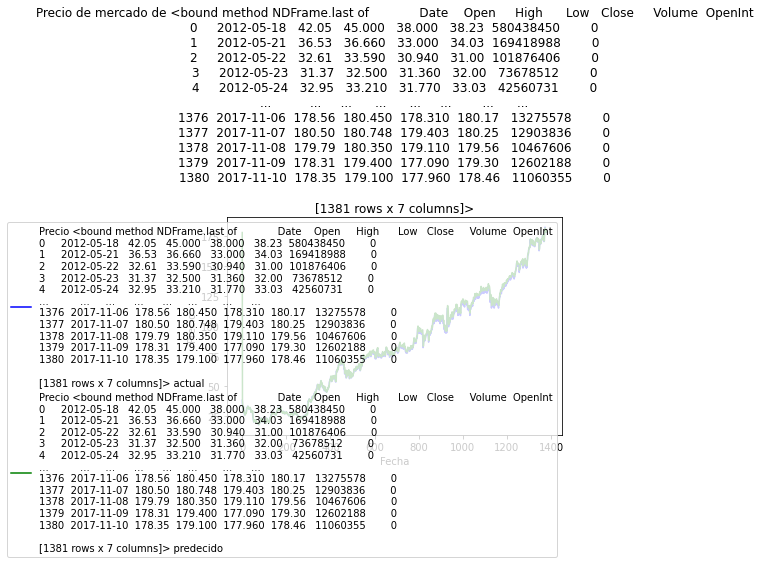

In [140]:
#Grafico los resultados para que sean mas visuales
plt.plot(precio_actual, color='blue', label=f'Precio {fb.last} actual') #'activo' es lo que tenia para cuando estaba haciendo webscrapping que se ha ido a la mierda
plt.plot(precios_predecidos, color='green', label=f'Precio {fb.last} predecido')
plt.title(f'Precio de mercado de {fb.last}')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()

In [126]:
#Prediccion de los siguientes dias
datos_reales = [model_inputs[len(model_inputs) +1 - predecir_dias:len(model_inputs +1), 0]] #probar cambiando el +1 por 10 siguientes dias
datos_reales = np.array(precios_predecidos)
datos_reales = np.reshape(datos_reales, (datos_reales.shape[0], datos_reales.shape[1], 1))

In [127]:
datos_reales = [model_inputs[len(model_inputs) +1 - predecir_dias:len(model_inputs +1), 0]] #probar cambiando el +1 por 10 siguientes dias
datos_reales = np.array(precios_predecidos)
datos_reales = np.reshape(datos_reales, (datos_reales.shape[0], datos_reales.shape[1], 1))

In [128]:
prediccion = model_6.predict(datos_reales)
prediccion = scaler.inverse_transform(prediccion)
print(prediccion)

[[323.3704 ]
 [321.4361 ]
 [321.35638]
 ...
 [323.37308]
 [323.37207]
 [323.37167]]


In [ ]:
#EJERCICIO 7
#Entrena un modelo en Keras que combine capas GRU y convolucionales para predecir los
#valores de cierre de facebook utilizando como entrada únicamente los valores de apertura de
#los datos facebook de los 10 días anteriores y que obtenga unos resultados en test mejores
#que los del apartado anterior.

In [141]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import datetime as dt
import pandas_datareader as web
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dropout, Dense, Conv1D

In [142]:
#No me permite hacer webcrapping por lo tante me descargo los datos de internet en un csv para pasarselos
#fb_2 = pd.read_csv('C:\\Users\\ignac\\OneDrive\\Escritorio\\BME\\Master\\CLASES\\Modulo 4\\Redes Convolucionales\\Practica\\fb.csv', sep=',')
fb_2 = pd.read_csv('fb.csv', sep=',')
print(fb_2)

            Date    Open     High      Low   Close     Volume  OpenInt
0     2012-05-18   42.05   45.000   38.000   38.23  580438450        0
1     2012-05-21   36.53   36.660   33.000   34.03  169418988        0
2     2012-05-22   32.61   33.590   30.940   31.00  101876406        0
3     2012-05-23   31.37   32.500   31.360   32.00   73678512        0
4     2012-05-24   32.95   33.210   31.770   33.03   42560731        0
...          ...     ...      ...      ...     ...        ...      ...
1376  2017-11-06  178.56  180.450  178.310  180.17   13275578        0
1377  2017-11-07  180.50  180.748  179.403  180.25   12903836        0
1378  2017-11-08  179.79  180.350  179.110  179.56   10467606        0
1379  2017-11-09  178.31  179.400  177.090  179.30   12602188        0
1380  2017-11-10  178.35  179.100  177.960  178.46   11060355        0

[1381 rows x 7 columns]


In [143]:
fb_open = fb_2['Open']
fb_close = fb_2['Close']
print(fb_open)

0        42.05
1        36.53
2        32.61
3        31.37
4        32.95
         ...  
1376    178.56
1377    180.50
1378    179.79
1379    178.31
1380    178.35
Name: Open, Length: 1381, dtype: float64


In [144]:
#Ordeno los datos y hago la particion de test y train, usare 1000 para entrenar y el rewsto para validar el modelo
open_2 = fb_open.values[np.arange(0,1000,1)]
close_2 = fb_close.values[np.arange(0,1000,1)]

In [145]:
#Hago grupos de 10 dias 
kk_train = np.reshape(open_2,(100, 10,1))
tt_train = close_2[np.arange(9, 1000, 10)]

In [146]:
#Elijo los 300 siguientres datos de cierre y apertura, y hago grupos de 10 dias
open_2 = fb_open.values[np.arange(1000, 1300, 1)]
close_2 = fb_close.values[np.arange(1000, 1300, 1)]

#reparto en 30 grupos de 10 dias
kk_test = np.reshape(open_2, (30,10,1))
tt_test = close_2[np.arange(9, 100, 10)]

In [162]:
#Creo el modelo
input_shape=kk_train.shape[1:]

model_7 = Sequential()
model_7.add(GRU(32, input_shape=input_shape, activation='relu', return_sequences=True))
model_7.add(Conv1D(48, kernel_size=3, activation="relu", input_shape=input_shape, padding='valid'))
model_7.add(MaxPooling1D()) 
model_7.add(GRU(32, activation='relu')) 
model_7.add(Flatten())
model_7.add(Dense(1))

In [164]:
#Conmpiklo el modelo
model_7.compile(optimizer='adam', loss='mae')

In [165]:
model_7.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 10, 32)            3360      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 8, 48)             4656      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4, 48)             0         
_________________________________________________________________
gru_3 (GRU)                  (None, 32)                7872      
_________________________________________________________________
flatten_8 (Flatten)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 15,921
Trainable params: 15,921
Non-trainable params: 0
__________________________________________________

In [166]:
#Entreno el modelo
model_7.fit(kk_train, tt_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
4/4 [==============================] - 2s 42ms/step - loss: 62.9678
Epoch 2/10
4/4 [==============================] - 0s 32ms/step - loss: 61.3593
Epoch 3/10
4/4 [==============================] - 0s 33ms/step - loss: 59.5222
Epoch 4/10
4/4 [==============================] - 0s 30ms/step - loss: 57.3730
Epoch 5/10
4/4 [==============================] - 0s 34ms/step - loss: 54.2586
Epoch 6/10
4/4 [==============================] - 0s 35ms/step - loss: 49.7926
Epoch 7/10
4/4 [==============================] - 0s 35ms/step - loss: 43.1074
Epoch 8/10
4/4 [==============================] - 0s 31ms/step - loss: 32.2945
Epoch 9/10
4/4 [==============================] - 0s 39ms/step - loss: 14.3300
Epoch 10/10
4/4 [==============================] - 0s 31ms/step - loss: 8.8691


In [167]:
#Realizo la prediccion
prediccion_2=model_7.predict(kk_test)

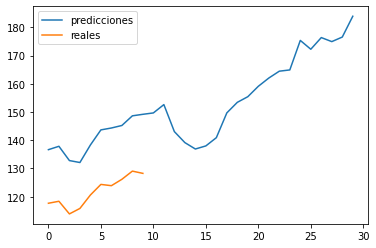

In [168]:
%matplotlib inline
plt.figure()
plt.plot(prediccion_2,label='predicciones')
plt.plot(tt_test,label='reales')
plt.legend()

In [169]:
#Evaluo el modelo
score = model_7.evaluate(kk_train, tt_train, batch_size=128)

score

1/1 [==============================] - 0s 275ms/step - loss: 11.9481


11.948070526123047

In [154]:
#EJERCICIO 8
#Diseña un modelo en Keras que utilice capas densas, LSTM, GRU, y convolucionales para
#predecir los valores de cierre facebook utilizando como entrada los valores de apertura de los
#datos facebook, apple y google de los 10 días anteriores.

In [170]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
import shutil
!pip install pydot
!pip install graphviz
import graphviz
import pydot

In [176]:
#Descargo los datos
#faceb=pd.read_csv('C:\\Users\\ignac\\OneDrive\\Escritorio\\BME\\Master\\CLASES\\Modulo 4\\Redes Convolucionales\\Practica\\fb.csv', sep=',')
#google=pd.read_csv('C:\\Users\\ignac\\OneDrive\\Escritorio\\BME\\Master\\CLASES\\Modulo 4\\Redes Convolucionales\\Practica\\Kaggle\\googl.csv', sep=',')
#('C:\\Users\\ignac\\OneDrive\\Escritorio\\BME\\Master\\CLASES\\Modulo 4\\Redes Convolucionales\\Practica\\Kaggle\\aapl.csv', sep=',')
faceb=pd.read_csv('fb.csv', sep=',')
google=pd.read_csv('googl.csv', sep=',')
apple=pd.read_csv('aapl.csv', sep=',')
apple

,Date,Open,High,Low,Close,Volume,OpenInt
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0
...,...,...,...,...,...,...,...
8359,2017-11-06,171.75000,174.36000,171.10000,173.63000,34901241,0
8360,2017-11-07,173.29000,174.51000,173.29000,174.18000,24424877,0
8361,2017-11-08,174.03000,175.61000,173.71000,175.61000,24451166,0
8362,2017-11-09,174.48000,175.46000,172.52000,175.25000,29533086,0


In [177]:
#Guardo las entradas que kle vamos a dar que son las aperturas de facebook, google y apple
fb_apertura=faceb['Open']
apple_apertura=apple['Open']
googl_apertura=google['Open']

In [178]:
fb_cierre=faceb['Close']
apple_cierre=apple['Close']
googl_cierre=google['Close']

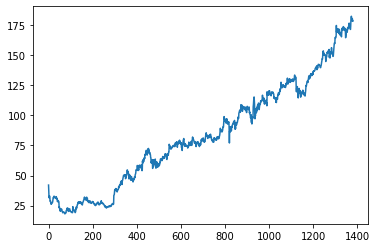

In [179]:
#Veo los graficos
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(fb_apertura)

In [180]:
# Como no coinciden en el tiempo los 3 valores me cojo solo los que coinciden
# Primero me los ordeno teniendo en cuenta la fecha
# Como no coinciden en el tiempo los 3 valores me cojo solo los que coinciden
# Primero me los ordeno teniendo en cuenta la fecha
aa = google['Date'].values
googl_indice = np.zeros(aa.shape)
for n in range(0, aa.shape[0]):
    cc = aa[n]
    qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
    qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
    qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

    googl_indice[n] = (qq1-2000)*365 + qq2*30 + qq3

###################################
bb = google['Date'].values
googl_indice_cl = np.zeros(aa.shape)
for n_cl in range(0, aa.shape[0]):
    cc_cl = bb[n]
    qq1_cl = np.asarray(cc[0:4], dtype=np.float64, order='C')
    qq2_cl = np.asarray(cc[5:7], dtype=np.float64, order='C')
    qq3_cl = np.asarray(cc[8:10], dtype=np.float64, order='C')

    googl_indice_cl[n_cl] = (qq1_cl-2000)*365 + qq2_cl*30 + qq3_cl

In [181]:
aa = apple['Date'].values
apple_indice = np.zeros(aa.shape)
for n in range(0, aa.shape[0]):
    cc = aa[n]
    qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
    qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
    qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

    apple_indice[n] = (qq1-2000)*365 + qq2*30 + qq3

######################################################3
bb = apple['Date'].values
apple_indice_cl = np.zeros(aa.shape)
for n_cl in range(0, aa.shape[0]):
    cc_cl = bb[n]
    qq1_cl = np.asarray(cc[0:4], dtype=np.float64, order='C')
    qq2_cl = np.asarray(cc[5:7], dtype=np.float64, order='C')
    qq3_cl = np.asarray(cc[8:10], dtype=np.float64, order='C')

    apple_indice_cl[n_cl] = (qq1_cl-2000)*365 + qq2_cl*30 + qq3_cl

In [182]:
aa = faceb['Date'].values
fb_indice = np.zeros(aa.shape)
for n in range(0, aa.shape[0]):
    cc = aa[n]
    qq1 = np.asarray(cc[0:4], dtype=np.float64, order='C')
    qq2 = np.asarray(cc[5:7], dtype=np.float64, order='C')
    qq3 = np.asarray(cc[8:10], dtype=np.float64, order='C')

    fb_indice[n] = (qq1-2000)*365 + qq2*30 + qq3

#########################################################

bb = faceb['Date'].values
fb_indice_cl = np.zeros(aa.shape)
for n_cl in range(0, aa.shape[0]):
    cc_cl = bb[n]
    qq1_cl = np.asarray(cc[0:4], dtype=np.float64, order='C')
    qq2_cl = np.asarray(cc[5:7], dtype=np.float64, order='C')
    qq3_cl = np.asarray(cc[8:10], dtype=np.float64, order='C')

    fb_indice_cl[n_cl] = (qq1_cl-2000)*365 + qq2_cl*30 + qq3_cl

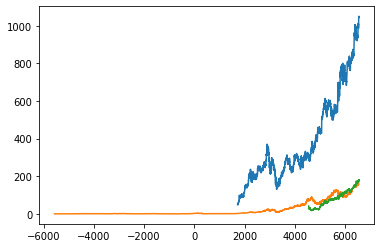

In [183]:
# Los ploteo y veo que hay un tramo en el coinciden las fechas
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(googl_indice,googl_apertura)
plt.plot(apple_indice,apple_apertura)
plt.plot(fb_indice,fb_apertura)

In [184]:
# Me quedo solo las fechas que coinciden
indices = set(googl_indice) & set(apple_indice) & set(fb_indice) 

ii = np.in1d(googl_indice,list(indices))
data_googl = googl_apertura[ii]
ii = np.in1d(apple_indice,list(indices))
data_apple = apple_apertura[ii]
ii = np.in1d(fb_indice,list(indices))
data_fb = fb_apertura[ii]

##########################################################################################

indices_cierre = set(googl_indice_cl) & set(apple_indice_cl) & set(fb_indice_cl) 

ii_cierre = np.in1d(googl_indice_cl,list(indices_cierre))
data_googl_cl = googl_cierre[ii_cierre]
ii_cierre = np.in1d(apple_indice_cl,list(indices_cierre))
data_apple_cl = apple_cierre[ii_cierre]
ii_cierre = np.in1d(fb_indice_cl,list(indices_cierre))
data_fb_cl = fb_cierre[ii_cierre]

In [186]:
# Los coloco todos juntos en un dataset
DATOS = np.zeros((data_googl.shape[0],3))
DATOS[:,0] = data_googl
DATOS[:,1] = data_apple
DATOS[:,2] = data_fb

####################################################

DATOS_CIERRE = np.zeros((data_googl.shape[0],3))
DATOS_CIERRE[:,0] = data_googl
DATOS_CIERRE[:,1] = data_apple
DATOS_CIERRE[:,2] = data_fb

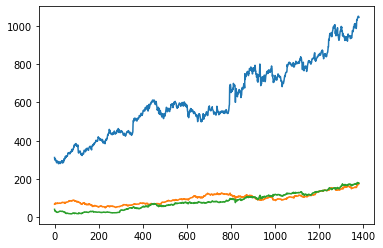

In [187]:
# Los ploteo
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(DATOS[:,0])
plt.plot(DATOS[:,1])
plt.plot(DATOS[:,2])

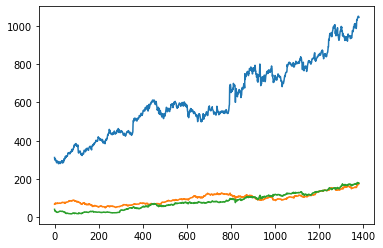

In [188]:
#Grafico los cierres
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(DATOS_CIERRE[:,0])
plt.plot(DATOS_CIERRE[:,1])
plt.plot(DATOS_CIERRE[:,2])

In [189]:
# Reordeno el dataset para hacer bloques de LAG dias
# DATOS ERA ANTES DAT E IBA BIEN PERO AHORA SE HA JODIDO NO SE POR QUE PUTO ULTINMO DIA 
LAG = 10
DATOS_TS = np.zeros((DATOS.shape[0]-LAG,LAG,DATOS.shape[1]))

for ii in range(0,DATOS.shape[0]-LAG):
    DATOS_TS[ii,:,:] = DATOS[ii:ii+LAG,:]

########################################################################

LAG_cl = 10
DATOS_TS_cl = np.zeros((DATOS_CIERRE.shape[0]-LAG_cl,LAG_cl,DATOS_CIERRE.shape[1]))

for ii_cierre in range(0,DATOS_CIERRE.shape[0]-LAG):
    DATOS_TS_cl[ii_cierre,:,:] = DATOS_CIERRE[ii_cierre:ii_cierre+LAG_cl,:]

In [190]:
#Selecciono 9 dias para entrada y el dia 10 de la variable "Y_target" que es lo que se va a predecir
#Separo en train y test

Ntr = np.floor(DATOS_TS_cl.shape[0]/2)
Y_target = 0

XX_tr = DATOS_TS[range(0,np.int(Ntr)),0:LAG-1,:]
#XX_ts = DATOS_TS[range(np.int(Ntr)+1,2*np.int(Ntr)),0:LAG-1,:]
XX_ts = DATOS_CIERRE[range(np.int(Ntr)+1,2*np.int(Ntr)),0:LAG_cl-1,:]

YY_tr = DATOS_TS[range(0,np.int(Ntr)),LAG-1,Y_target]
#YY_ts = DATOS_TS[range(np.int(Ntr)+1,2*np.int(Ntr)),LAG-1,Y_target]
YY_ts = DATOS_CIERRE[range(np.int(Ntr)+1,2*np.int(Ntr)),LAG_cl-1,Y_target]

LAG-1

IndexError: ignored

In [ ]:
# Definimos un modelo con una capa convolucional 1D y 1 capa densa
model_8 = Sequential()
model_8.add(Conv1D(10, 3, input_shape=XX_tr.shape[1:],padding='same'))
model_8.add(Flatten())
model_8.add(Dense(1))

# mostramos el modelo
model_8.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 9, 10)             100       
_________________________________________________________________
flatten_12 (Flatten)         (None, 90)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 91        
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compilamos el modelo
model_8.compile(optimizer='adam',loss='mae')

In [ ]:
# Entrenamos el modelo, nos guardamos la evolución en 'history' 
# Esto es equivalente a usar callbacks para history
history = model_8.fit(XX_tr, YY_tr, batch_size=32, epochs=300, verbose=1)

NameError: name 'YY_tr' is not defined

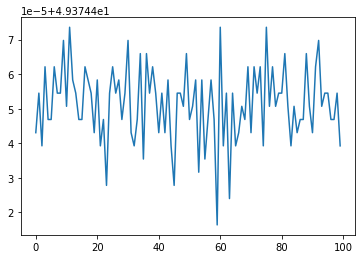

In [ ]:
# Mostramos la evolucion del entrenamiento

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(history.history['loss'][0:])

In [ ]:
# Evaluamos el modelo en train
score = model_8.evaluate(XX_tr, YY_tr, verbose=0)
score

NameError: name 'model_8' is not defined

In [ ]:
# Predecimos con los datos de train
y_hat = model_8.predict(XX_tr)
np.mean(abs(y_hat[:,0]-YY_tr))

NameError: name 'model_8' is not defined

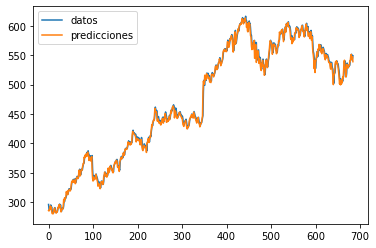

In [ ]:
# Mostramos las predicciones
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(y_hat, label='datos')
plt.plot(YY_tr, label='predicciones')
plt.legend()

In [ ]:
# Predecimos en test
y_hat = model_8.predict(XX_ts)
# mostramos el error
np.mean(abs(y_hat[:,0]-YY_ts))

7.269405142800849

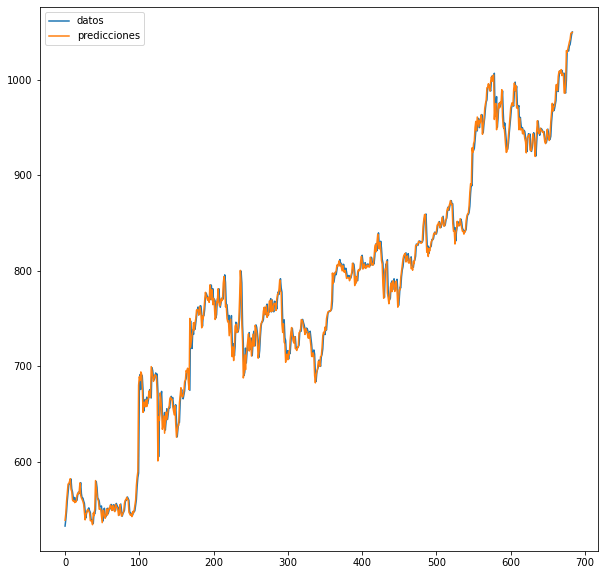

In [ ]:
# Mostramos las predicciones
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
plt.plot(y_hat, label='datos')
plt.plot(YY_ts, label='predicciones')
plt.legend()

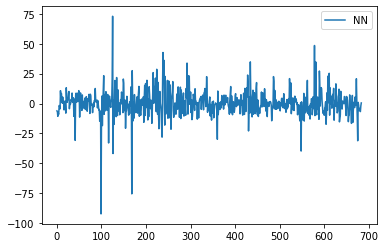

In [ ]:
# Estas son las diferencias
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(y_hat[:,0]-YY_ts, label='NN')
plt.legend()

In [ ]:
#EJERCICIO 9
#Diseña un modelo en Keras que utilice capas convolucionales 2D para predecir los valores
#de cierre facebook utilizando como entrada imágenes de la evolución del valor durante los 10
#días anteriores. Usa el tipo de imágenes que creas mas conveniente (de barras, de velas,
#lineal...).

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
import datetime as dt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dropout, Dense, Conv2D

In [ ]:
FB = pd.read_csv('C:\\Users\\ignac\\OneDrive\\Escritorio\\BME\\Master\\CLASES\\Modulo 4\\Redes Convolucionales\\Practica\\fb.csv', sep=',')
FB

,Date,Open,High,Low,Close,Volume,OpenInt
0,2012-05-18,42.05,45.000,38.000,38.23,580438450,0
1,2012-05-21,36.53,36.660,33.000,34.03,169418988,0
2,2012-05-22,32.61,33.590,30.940,31.00,101876406,0
3,2012-05-23,31.37,32.500,31.360,32.00,73678512,0
4,2012-05-24,32.95,33.210,31.770,33.03,42560731,0
...,...,...,...,...,...,...,...
1376,2017-11-06,178.56,180.450,178.310,180.17,13275578,0
1377,2017-11-07,180.50,180.748,179.403,180.25,12903836,0
1378,2017-11-08,179.79,180.350,179.110,179.56,10467606,0
1379,2017-11-09,178.31,179.400,177.090,179.30,12602188,0
